# Visualizing Your Data with Histograms

One tool that can be incredibly powerful for summarizing data alongside the functions detailed in our last reading is the *histogram*. A histogram is a tool for displaying the distribution of data in a vector in a plot. To illustrate, let's consider a simple vector with some made-up ages of students in a master's program:

In [1]:
import numpy as np

student_ages = np.array([22, 23, 22, 21, 23, 25, 38, 24, 23, 30, 25, 25])
student_ages

array([22, 23, 22, 21, 23, 25, 38, 24, 23, 30, 25, 25])

Obviously, this is a pretty small vector so we can get a sense of it just by looking at it, but suppose it were larger: how might you try and characterize it? Well, you might use `np.mean` to get the average, and `np.max` and `np.min` to get a sense of extreme values. But even then, those three data points don't tell you everything. 

So let's create a histogram of these ages. We'll do so with the `hist` function from the `pyplot` module of the library `matplotlib`. We haven't talked about this library at all yet, so this may seem a little out of left field, but don't worry—data visualizations are *such* an important part of data science that we'll do a full module on them later in this specialization. But histograms are so helpful for getting a *feel* for your data that we're going to introduce this one function now.

(array([3., 4., 3., 0., 0., 1., 0., 0., 0., 1.]),
 array([21. , 22.7, 24.4, 26.1, 27.8, 29.5, 31.2, 32.9, 34.6, 36.3, 38. ]),
 <BarContainer object of 10 artists>)

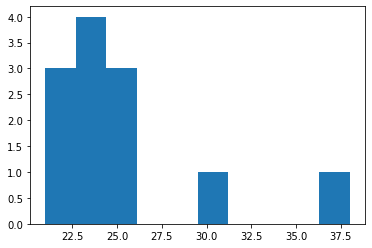

In [10]:
from matplotlib import pyplot as plt

plt.hist(student_ages)

Voilà, your first histogram! Let's break this down.

A histogram is made up of a series of vertical bars. Each bar covers a range of possible values on the bottom of the figure (the x-axis), and the height of each bar is determined by the number of observations in the original data whose value is in the range the bar covers. 

So for example the bar on the farthest right covers the values from about 36 to 38, and so it has a height (read on the left side of the figure, called the y-axis) of 1 because there's only one observation in our vector with a value between 36 and 38. The bars on the left, by contrast, are much taller because there are more observations in the ranges each of those bars covers.

Note that the ranges each bar covers as generally referred to as *bins* since we can think of a histogram as collecting all the observations in a given range, collecting them in a single bin, and then plotting a bar based on the number of observations in each bin.

Together, these bars help give us a real *feel* for the distribution of student ages in the class in a way that `np.mean()`, `np.min()`, and `np.max()` could not: the vast majority of students are about 24, but there are also a couple of older students in the class. 

(If you look *really* closely, you'll actually also notice that what `plt.hist()` is returning is a tuple consisting of two numpy arrays and the plot itself (identified as a `<BarContainer object of 10 artists>`). The first numpy array contains the number of observations in each bin and the second numpy array contains all the edges of the bins over which observations are being counted.)

**Note:** As we will discuss when we get into data visualizations in more detail, one should *always* label plots and axes; the only reason we are doing that now is that we want to keep your focus on numpy, vectors, and arrays and not get into how to manipulate the properties of plots here. But we promise to explain the importance of labeling your data and how to do it soon!

## Plotting a Bigger Dataset

Of course, in this case, we could have figured the distribution out by looking at the vector itself given it only had 12 values. But that will almost never be the case when you're working with real data. So let's see how valuable histograms can be with some real data! Let's load a vector with the random sample of household incomes from the United States Census we'll be working with in a later exercise:

In [3]:
income = np.loadtxt("data/us_household_incomes.txt")
income


array([ 53308., 102050., 192994., ..., 407460.,  19856., 154754.])

In [4]:
len(income)


933695

As we will discuss in more detail in a later reading, this data comes from a survey of US Households conducted by the US Census Bureau, and each observation is the annual income of a randomly sampled household. And because it has 933,695 observations, there's no way we can get a good sense of the distribution just by looking at the data.

We could of course try and get a general sense with the functions we've discussed before. For example, the average household income is:

In [5]:
np.mean(income)


88298.96448626157

$88,299! Not bad. 

OK, next up we'll try and get a better sense of this data by creating a histogram, but before we do pause for a moment and think about what you think the histogram will look like. Do you think it will be pretty flat, with roughly the same share of households making 40,000 as make 89,000? Or do you think it'll look like a bell curve centered on $89,000 where most households are making about that much money, and the further you get from that the fewer the number of households?


Do you have a guess? 

Then let's look at the data:

(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

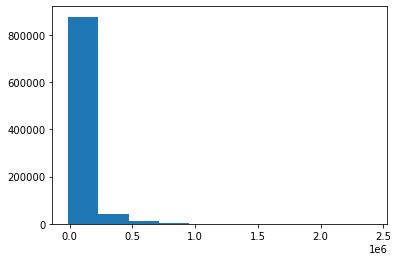

In [6]:
plt.hist(income)


Now *that* is definitely not uniform or a bell curve! 

In this figure, values along the bottom (x-axis) correspond to household incomes. Note that the `1e6` plotted in the bottom right means that you have to multiply all the values along the x-axis by $10^6$ (1,000,000) to get the actual value, so 0.5 on the x-axis corresponds to an income of $500,000. Values on the left (the y-axis) are the total number of observations in each range. Recall we saw above that there are only 933,695 observations in the data, so that first bar on the left really contains almost all our observations!

This distribution is what we call *right skewed*, meaning that most of the observations are on the left side, but there are a small number of extreme values out on the right side ("in the tail"). 

In fact, this distribution is even more right-skewed than you might initially think because the reason that the plot extends all the way out to 2.5 (which, again, corresponds to 2.5 times 1,000,000 = 2,500,000) is that there are a *very* small number of households with incomes that large. The number is so small that they don't even merit a single pixel given the scale we're using on the y-axis, but `plt.hist()` extended the y-axis all the way out there because there are values that large. Indeed, using `np.max` we can see that the highest income in this data is:

In [7]:
np.max(income)


2410903.0

$2,410,903!

(Even then, that's actually nowhere near the highest real household income in the US. First, when the Census Bureau asks about "income," it does not include things like increases in the value of stocks a person owns. Given that's *where* most increases in wealth for people like Jeff Bezos and Elon Musk come from, that means we're missing a lot of big earners. And second, this data comes from a 1% sample of all households in the US, which makes it poorly suited to characterizing extreme values in data distributed like this—there's only one Elon Musk and one Jeff Bezos, so even if their income were to be calculated properly, the odds they were included in this survey is very low). 

Indeed, we can study these high earners in more detail by subsetting our data to only include observations for households that earn more than $1,000,000. We'll discuss all the nuances of how to do this in the second half of the week, but so that you can see that there are in fact observations on the far right, I'll do a histogram of just high earners here:

(array([234.,  82.,  68.,  24.,   8.,   8.,   1.,   3.,   1.,   1.]),
 array([1002000. , 1142890.3, 1283780.6, 1424670.9, 1565561.2, 1706451.5,
        1847341.8, 1988232.1, 2129122.4, 2270012.7, 2410903. ]),
 <BarContainer object of 10 artists>)

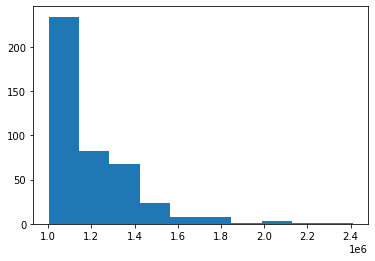

In [8]:
# Subset our vector, keeping only the observations for 
# households earning more than a million dollars a year.
# I haven't shown you had to do this yet,
# but I will before the week is over!
just_high_earners = income[income > 1_000_000]

# Now plot a histogram for these high earners
plt.hist(just_high_earners)

As we can see, where our previous histogram had a y-axis that extended above 800,000—because there was a single bin with that many observations—here the largest bin contains less than 250 people, and so the y-axis is effectively "zoomed in", allowing us to see that there *are* observations at the very high incomes, we just couldn't see them before because the number of observations was very, very small (e.g. less than 10). 

## Bins

In the histogram above, the first bar basically covers everything from $0 to $250,000, which we can also see is where most households' incomes occur. So what if we want the bars to be more skinny so we can see more of the distribution on the left?

The ranges that bars cover are called "bins", and we can change the number of bins in a histogram with the `bins` keyword. So to get smaller bins, we just need to ask `plt.hist` to split our data into a larger number (and thus smaller) of bins:

(array([1.68165e+05, 3.08149e+05, 2.00715e+05, 1.11283e+05, 5.85780e+04,
        3.06520e+04, 1.65090e+04, 9.72000e+03, 5.95700e+03, 4.29400e+03,
        3.68900e+03, 3.33400e+03, 2.94300e+03, 2.51700e+03, 1.73700e+03,
        1.13600e+03, 1.02800e+03, 8.10000e+02, 6.05000e+02, 3.88000e+02,
        3.22000e+02, 2.45000e+02, 2.23000e+02, 1.38000e+02, 1.13000e+02,
        9.70000e+01, 5.50000e+01, 5.60000e+01, 5.60000e+01, 2.10000e+01,
        1.80000e+01, 2.30000e+01, 1.50000e+01, 3.20000e+01, 1.90000e+01,
        1.00000e+01, 1.00000e+01, 6.00000e+00, 5.00000e+00, 3.00000e+00,
        3.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -16942.        ,   23522.08333333,   63986.16666667,
         104450.25      ,  144914.33333333,  185378.41666667

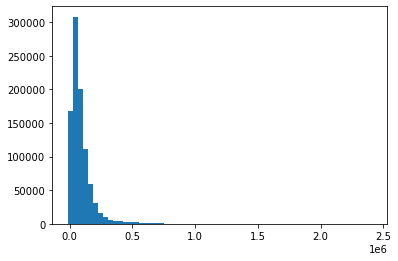

In [9]:
plt.hist(income, bins=60)


That's a little better, though obviously, the main problem is that most of the figure is being taken up by those extremely high-income individuals. So maybe in a future exercise we'll subset our data and just look at household incomes below 1 million dollars... :) 

For the moment, though, I hope this has done a good job of illustrating for you the value of histograms for getting a "feel" for your data!